# Contents: Data Visualizations

1. Environment Setup
2. Basic Statistics
3. Data Derivations
4. Data Visualizations Pt. 1
5. Data Visualizations Pt. 2
6. Saving Graphs

In this script we are using our cleaned and prepared data set and creating tables and visualizations to assist us with our analysis. We also created some more specific columns to help us with the more specialized requests from Instacart.

### 1. Environment Setup

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import data sets
path = r'C:\Users\felix\Documents\PSU\class\Instacart Basket Analysis'

ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

### 2. Basic Statistics

In [3]:
ords_prods_all.head()

,order_id,user_id,user_order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spender,median_days_last_order,freq_customer,Gender,State,Age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,11.11484,196,1,0,Soda,...,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.00000,196,1,1,Soda,...,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.00000,196,1,1,Soda,...,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.00000,196,1,1,Soda,...,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.00000,196,1,1,Soda,...,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423


In [4]:
ords_prods_all.shape

(32404859, 30)

In [5]:
ords_prods_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 30 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                object 
 1   user_id                 object 
 2   user_order_number       int64  
 3   order_day_of_week       int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   product_name            object 
 10  aisle_id                int64  
 11  department_id           int64  
 12  prices                  float64
 13  price_range_loc         object 
 14  busiest_day             object 
 15  busiest_days            object 
 16  busiest_period_of_day   object 
 17  max_order               int64  
 18  loyalty_flag            object 
 19  mean_prices_products    float64
 20  spender                 object 
 21  median_days_last_order  float

In [6]:
ords_prods_all.describe()

,user_order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,mean_prices_products,median_days_last_order,Age,n_dependants,income
count,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07
mean,1.714230e+01,2.738867e+00,1.342515e+01,1.110477e+01,2.559866e+04,8.352547e+00,5.895873e-01,7.119612e+01,9.919792e+00,1.198023e+01,3.305217e+01,1.198023e+01,1.002895e+01,4.946527e+01,1.501896e+00,9.943773e+04
std,1.753532e+01,2.090077e+00,4.246380e+00,8.493183e+00,1.408400e+04,7.127071e+00,4.919087e-01,3.821139e+01,6.281485e+00,4.956554e+02,2.515525e+01,8.324227e+01,6.324929e+00,1.848558e+01,1.118865e+00,4.305727e+04
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.354400e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,4.200000e+00,1.300000e+01,7.387298e+00,6.000000e+00,3.300000e+01,1.000000e+00,6.700400e+04
50%,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,2.530200e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00,7.400000e+00,2.600000e+01,7.824786e+00,8.000000e+00,4.900000e+01,2.000000e+00,9.661800e+04
75%,2.400000e+01,5.000000e+00,1.600000e+01,1.400000e+01,3.794700e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.130000e+01,4.700000e+01,8.254023e+00,1.200000e+01,6.500000e+01,3.000000e+00,1.279120e+05
max,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.450000e+02,1.000000e+00,1.340000e+02,2.100000e+01,9.999900e+04,9.900000e+01,2.500542e+04,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


### 3. Data Derivations

In [7]:
# regions [Northeast, Midwest, South, West]

region1 = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
region2 = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
region3 = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
region4 = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [8]:
# Creating Region flag
regions = []

for state in ords_prods_all['State']:
    if state in region1:
        regions.append('Northeast')
    elif state in region2:
        regions.append('Midwest')
    elif state in region3:
        regions.append('South')
    elif state in region4:
        regions.append('West')
    else:
        regions.append('Missing')

In [9]:
ords_prods_all['Region'] = regions

In [10]:
# checking to make sure nothing is missing

ords_prods_all['Region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: Region, dtype: int64

In [11]:
# creating new column orders_flag using max_order

ords_prods_all.loc[ords_prods_all['max_order'] >= 5, 'orders_flag'] = 'more'

In [12]:
ords_prods_all.loc[ords_prods_all['max_order'] < 5, 'orders_flag'] = 'less'

In [13]:
# creating a sample where all rows with the value less in the orders_flag column are removed

mask = ords_prods_all['orders_flag'].isin(['less'])
df_3 = ords_prods_all[~mask]

From the request of the Instacart CFO, we are using this new column we created orders_flag to remove all low-activity customers (deemed those who have less than 5 total orders on Instacart).

Here we are creating customer profiles for the different customers of Instacart based on their Age, income bracket, and number of dependants that they're living with.

In [14]:
# creating customer profiles
# starting with ages

age_list = []

for user in df_3['Age']:
    if (user >= 18) & (user < 35):
        age_list.append('Young adult')
    elif (user >= 35) & (user < 60):
        age_list.append('Middle aged adult')
    elif user >= 60:
        age_list.append('Elder adult')
    else:
        age_list.append('Age-Error')

In [15]:
# income brackets based off 2022 tax brackets

income_list = []

for money in df_3['income']:
    if money <= 41775:
        income_list.append('Low income')
    elif (money > 41775) & (money <= 89075):
        income_list.append('Low-Average income')
    elif (money > 89075) & (money <= 170050):
        income_list.append('Medium income')
    elif money > 170050:
        income_list.append('High income')
    else:
        income_list.append('Income-Error')

In [16]:
# dependants

dependants_list = []

for deps in df_3['n_dependants']:
    if deps == 0:
        dependants_list.append('Living alone')
    elif deps > 0:
        dependants_list.append('Living with dependants')
    else:
        dependants_list.append('Dependants-Error')

In [17]:
# combining lists into 1 profile variable

customer_profile = [' with '.join(x) for x in zip(age_list, income_list)]

In [18]:
customer_profile2 = [' '.join(x) for x in zip(customer_profile, dependants_list)]

In [19]:
df_3['customer_profile'] = customer_profile2

C:\Users\felix\AppData\Local\Temp\ipykernel_13212\2594148707.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['customer_profile'] = customer_profile2


This is a 30% sample of our data frame that we will be using for one of our visualizations below.

In [20]:
# creating a 30% sample of the data frame

np.random.seed(4)
dev = np.random.rand(len(df_3)) <= 0.7

In [21]:
big = df_3[dev]
small = df_3[~dev]

### 4. Data Visualizations Pt. 1

Question 1: What are the busiest days of the week?

Saturday and Sunday (day 0 and 1) are the busiest days of the week for Instacart.

Note: x-axis = day of the week

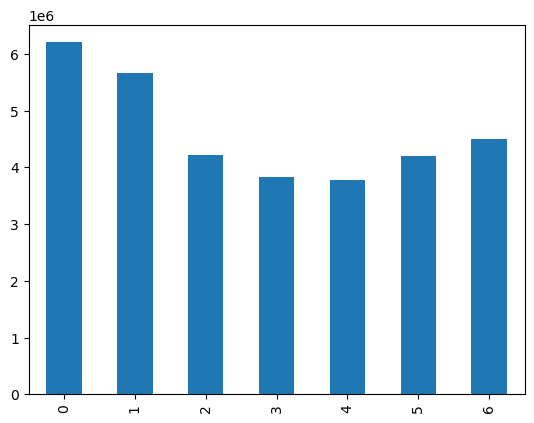

In [22]:
# bar chart of orders for each day of the week
# From 0 being Saturday, to 6 being Friday

bar = ords_prods_all['order_day_of_week'].value_counts().sort_index().plot.bar()

Question 2: What are the busiest hours of the day?

The hours between 8 am and 5 pm tend to be the busiest for Instacart business.
    
Note: x-axis = hour of the day

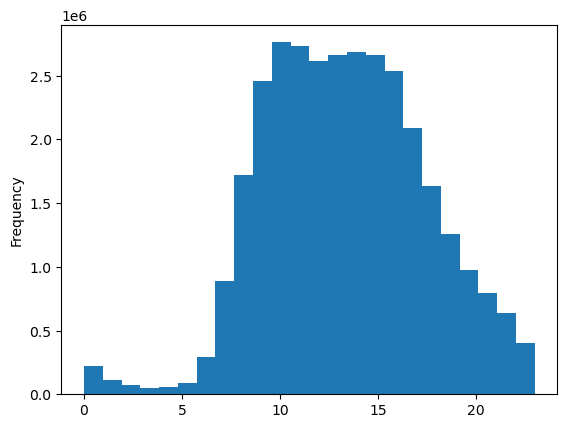

In [23]:
# histogram of orders during each hour of day

hist = ords_prods_all['order_hour_of_day'].plot.hist(bins = 24)

Question 3: Are there particular times of the day where people spend the most money?

Around 2am the amount of money spent tends to spike.

In [24]:
# creating a smaller data frame of only hours and prices

df_small = small[['order_hour_of_day', 'prices']]

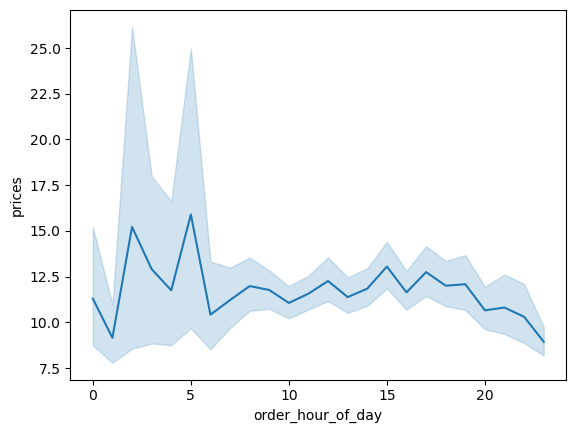

In [25]:
# line chart of prices by hour of day, using 30% sample

line = sns.lineplot(data = df_small, x = 'order_hour_of_day', y = 'prices')

Question 4: Marketing and sales wants to use simpler price range groupings to help direct their work.

Expensive products can be set at a range greater than $15. Depending on how many ranges the marketing and sales teams want to work with, the rest of the products can be borken up into smalelr bins.

Note: x-axis = prices, y-axis = number of products with that price

In [26]:
# changing these values in the prices column to missing, as they don't make sense in the data

ords_prods_all.loc[ords_prods_all['prices'] > 100, 'prices'] = np.nan

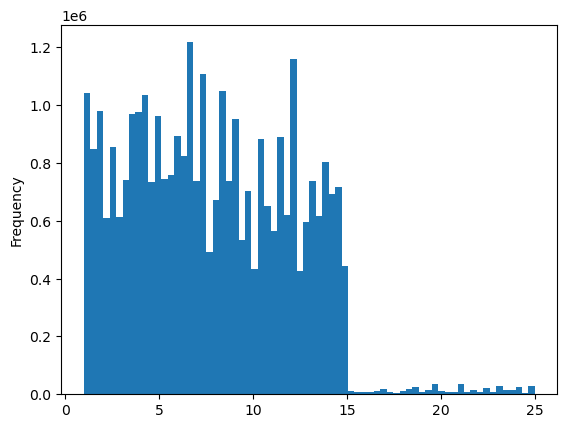

In [27]:
# histogram of prices

hist2 = ords_prods_all['prices'].plot.hist(bins = 70)

Question 5: Are there certain types of products that are more popular than others?

Department 4 (produce) has by far the most orders. Departments 16, 19, 7, and 1 (dairy eggs, snacks, beverages, frozen) also have a good amount of orders being made for.

Note: x-axis = department_id

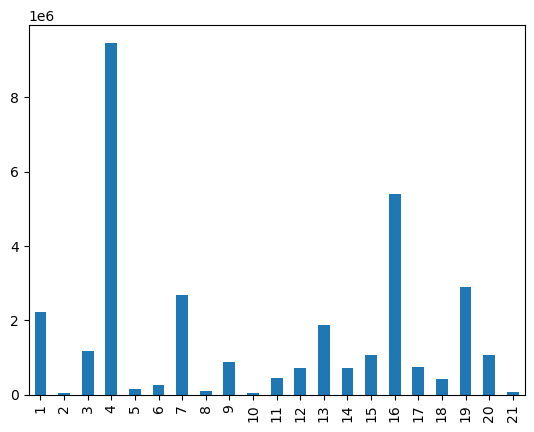

In [28]:
# bar chart of department orders
# refer to departments for specific department info

bar2 = ords_prods_all['department_id'].value_counts().sort_index().plot.bar()

### Data Visualizations Pt. 2

Question 6a. What's the distribution among users in regards to brand loyalty?

Regular customers make up the majority of users (those making a total between 10 and 40 orders through Instacart). Loyal customers (40+ total orders) are the 2nd largest group, with New customers (<10 total orders) making up the smallest portion of Instacart users.

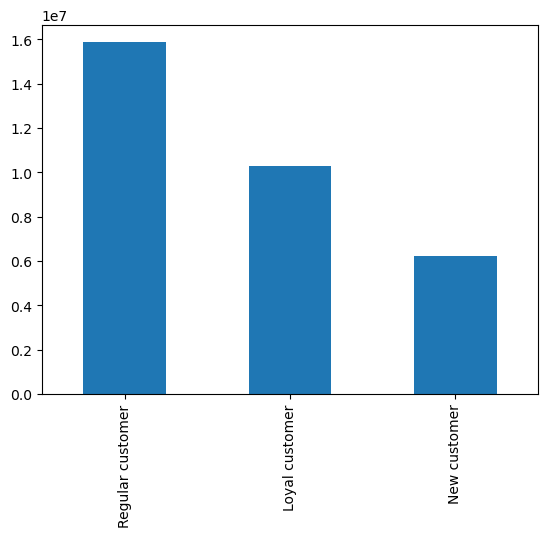

In [29]:
# bar chart of distributiont of customers based on loyalty

bar3 = ords_prods_all['loyalty_flag'].value_counts().plot.bar()

Question 6b. Are there differences in ordering habits based on a customer's loyalty status?

Loyal customers come back to Instacart much more often compared to New and Regular customers. All three customer groups also tend  to make the majority of their orders on Saturday, Sunday and Friday between the hours of 9 and 17.

In [30]:
# ordering habits based on customer loyalty

df_3.groupby('loyalty_flag').agg({'median_days_last_order': ['mean', 'min', 'max']})

median_days_last_order           
                                   mean  min   max
loyalty_flag                                      
Loyal customer                 5.235822  0.0  14.0
New customer                  16.647924  0.0  30.0
Regular customer              10.465278  0.0  30.0

In [31]:
pd.crosstab(df_3['order_hour_of_day'], df_3['loyalty_flag'])

loyalty_flag,Loyal customer,New customer,Regular customer
order_hour_of_day,,,
0,61748,35311,110983
1,30179,20674,58768
2,17788,12241,35662
3,13374,9510,25912
4,16882,8442,25439
5,29350,12475,42593
6,112865,33901,134247
7,346694,102170,414349
8,643895,208124,807091


In [32]:
pd.crosstab(df_3['order_day_of_week'], df_3['loyalty_flag'])

loyalty_flag,Loyal customer,New customer,Regular customer
order_day_of_week,,,
0,1754731,984879,3169000
1,1843401,818902,2749383
2,1352343,625288,2047075
3,1266495,560418,1842622
4,1292042,535931,1797021
5,1456715,587718,1989296
6,1318366,690559,2282379


Question 6c. Are there differences in ordering habits based on a customer's region?

This follows the same habits as the customer's loyalty status; Instacart users in every region tend to make most of their orders on Saturday, Sunday and Friday between the hours of 9 and 17.

In [33]:
# ordering habits based on customer region

df_3.groupby('Region').agg({'median_days_last_order': ['mean', 'min', 'max']})

median_days_last_order           
                            mean  min   max
Region                                     
Midwest                 9.752712  0.0  30.0
Northeast               9.661138  0.0  30.0
South                   9.684987  0.0  30.0
West                    9.649569  0.0  30.0

In [34]:
pd.crosstab(df_3['order_hour_of_day'], df_3['Region'])

Region,Midwest,Northeast,South,West
order_hour_of_day,,,,
0,48192,36600,69767,53483
1,25879,20529,35769,27444
2,16136,11842,20668,17045
3,11298,8843,16458,12197
4,12015,9043,17277,12428
5,19061,14733,29571,21053
6,64885,49025,95583,71520
7,201794,154031,288357,219031
8,384854,294134,559785,420337


In [35]:
pd.crosstab(df_3['order_day_of_week'], df_3['Region'])

Region,Midwest,Northeast,South,West
order_day_of_week,,,,
0,1390189,1043698,1955352,1519371
1,1263655,954332,1808348,1385351
2,947370,713159,1340387,1023790
3,855316,649305,1229002,935912
4,851501,637781,1205497,930215
5,943396,716128,1342849,1031356
6,1010086,750282,1429704,1101232


Question 6d. Is there a connection between age and family status in terms of ordering habits?

In conjunction with the next key question, we noticed that middle-aged and elderly adults are more often than not those that are married or divorced/widowed.  Married people will have families that they care for, and those divorced/widowed are all on the older side and likely ordering groceries for themselves. These two family statuses are more likely to use Instacart more often, whereas users living with parents and siblings or those that are single aren't necessarily ordering groceries as often.

In [36]:
# relationship between age and family status

df_3.groupby('fam_status').agg({'Age': ['mean', 'min', 'max']})

Age        
                                       mean min max
fam_status                                         
divorced/widowed                  70.510585  60  81
living with parents and siblings  19.502090  18  21
married                           51.495620  22  81
single                            38.600037  18  59

Question 6e. What different classifications does the demographic information suggest about our sample?

The demographic information suggests that the majority of Instacart customers are Middle-Aged and Elderly adults making a medium amount of income (between \\$89k and \\$170k). Young adults living with dependants on a low income also use Instacart quite often, which suggests that the Instacart service is reliable  for its low prices and/or its ease of use.

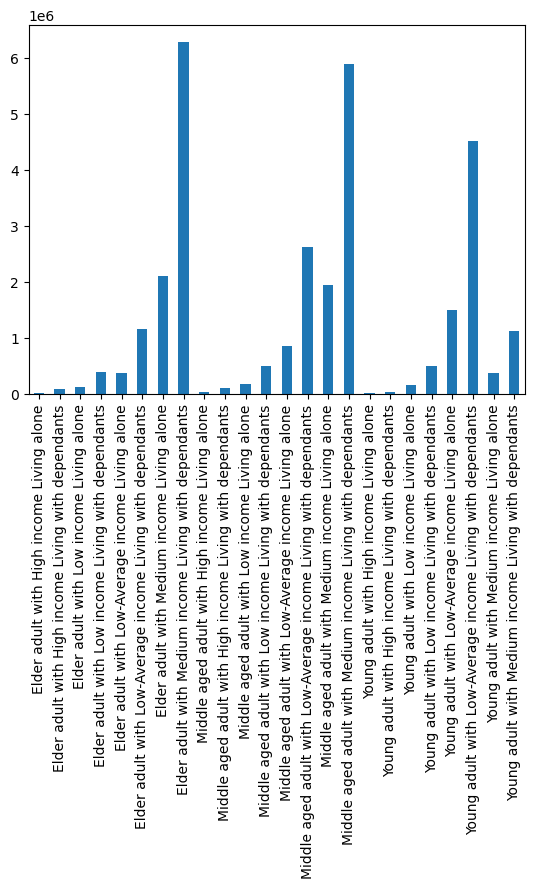

In [37]:
# bar chart of customer profiles

bar4 = df_3['customer_profile'].value_counts().sort_index().plot.bar()

Question 6f. What differences can you find in the ordering habits of different customer profiles?

The first thing that stands out is that the users with high incomes tend to make large purchases, which means they're doing all their shopping at once. Users with low or medium incomes tend to make much smaller purchases, which assumes that they just tend to buy what they need when they need it. There are what looks like a lot of extremely high cost orders that have occured in the high incom bracket though, but without more information on the use of Instacart products (that we aren't privy to), we can't tell if these are consistent orders that the Instacart marketing and sales teams could plan around for their advertising. The aggregation with the median days since a user's last order shows that every customer profile type tends to have a similar amount of time pass between each of their orders.

In [38]:
# mean/min/max for customer profile expenditure

df_3.groupby('customer_profile').agg({'mean_prices_products': ['mean', 'min', 'max']})

mean_prices_products  \
                                                                   mean   
customer_profile                                                          
Elder adult with High income Living alone                    238.149008   
Elder adult with High income Living with depend...           246.451257   
Elder adult with Low income Living alone                       6.510085   
Elder adult with Low income Living with dependants             6.518064   
Elder adult with Low-Average income Living alone               7.359398   
Elder adult with Low-Average income Living with...             7.335798   
Elder adult with Medium income Living alone                    9.523582   
Elder adult with Medium income Living with depe...             9.361299   
Middle aged adult with High income Living alone              262.853664   
Middle aged adult with High income Living with ...           246.637525   
Middle aged adult with Low income Living alone                 6.496049   
Middle aged adult with Low income Living with d...             6.503858   
Middle aged adult with Low-Average income Livin...             7.789077   
Middle aged adult with Low-Average income Livin...             7.741553   
Middle aged adult with Medium income Living alone             10.531639   
Middle aged adult with Medium income Living wit...             9.997206   
Young adult with High income Living alone                    299.015204   
Young adult with High income Living with depend...           297.361550   
Young adult with Low income Living alone                       6.518783   
Young adult with Low income Living with dependants             6.510266   
Young adult with Low-Average income Living alone               7.885137   
Young adult with Low-Average income Living with...             7.998260   
Young adult with Medium income Living alone                   21.430592   
Young adult with Medium income Living with depe...            21.259620   

                                                                             
                                                          min           max  
customer_profile                                                             
Elder adult with High income Living alone           25.423455   2673.245778  
Elder adult with High income Living with depend...  26.594308   7414.485185  
Elder adult with Low income Living alone             1.800000      6.997479  
Elder adult with Low income Living with dependants   1.262500      6.998925  
Elder adult with Low-Average income Living alone     1.308333     12.630769  
Elder adult with Low-Average income Living with...   1.300000     12.385714  
Elder adult with Medium income Living alone          7.000000  14042.512281  
Elder adult with Medium income Living with depe...   7.000000   2410.696774  
Middle aged adult with High income Living alone     24.405998  15006.940000  
Middle aged adult with High income Living with ...  24.103300   6983.593023  
Middle aged adult with Low income Living alone       1.000000      8.397633  
Middle aged adult with Low income Living with d...   2.257143     11.857143  
Middle aged adult with Low-Average income Livin...   1.100000   3453.431034  
Middle aged adult with Low-Average income Livin...   1.000000   1102.707619  
Middle aged adult with Medium income Living alone    7.000380   5135.893590  
Middle aged adult with Medium income Living wit...   7.000000   3549.811989  
Young adult with High income Living alone           26.759379   4174.447917  
Young adult with High income Living with depend...  24.579249  10209.987755  
Young adult with Low income Living alone             1.800000      9.043871  
Young adult with Low income Living with dependants   1.628571      9.588235  
Young adult with Low-Average income Living alone     2.100000     57.256623  
Young adult with Low-Average income Living with...   2.300000   1762.642105  
Young adult with Medium income Living alone          7.001282   8794.882427

In [39]:
# mean/min/max for customer profile usage frequency

df_3.groupby('customer_profile').agg({'median_days_last_order': ['mean', 'min', 'max']})

median_days_last_order  \
                                                                     mean   
customer_profile                                                            
Elder adult with High income Living alone                        8.558816   
Elder adult with High income Living with depend...               8.719387   
Elder adult with Low income Living alone                        10.119398   
Elder adult with Low income Living with dependants              10.276861   
Elder adult with Low-Average income Living alone                 9.822971   
Elder adult with Low-Average income Living with...               9.904697   
Elder adult with Medium income Living alone                      9.557102   
Elder adult with Medium income Living with depe...               9.641967   
Middle aged adult with High income Living alone                  8.425441   
Middle aged adult with High income Living with ...               9.385508   
Middle aged adult with Low income Living alone                  10.153100   
Middle aged adult with Low income Living with d...              10.489263   
Middle aged adult with Low-Average income Livin...               9.600018   
Middle aged adult with Low-Average income Livin...               9.721031   
Middle aged adult with Medium income Living alone                9.645715   
Middle aged adult with Medium income Living wit...               9.636977   
Young adult with High income Living alone                       10.095898   
Young adult with High income Living with depend...               8.926719   
Young adult with Low income Living alone                        10.822550   
Young adult with Low income Living with dependants              10.270235   
Young adult with Low-Average income Living alone                 9.690637   
Young adult with Low-Average income Living with...               9.647392   
Young adult with Medium income Living alone                      9.475827   
Young adult with Medium income Living with depe...               9.553027   

                                                               
                                                    min   max  
customer_profile                                               
Elder adult with High income Living alone           1.0  30.0  
Elder adult with High income Living with depend...  1.0  30.0  
Elder adult with Low income Living alone            0.0  30.0  
Elder adult with Low income Living with dependants  0.0  30.0  
Elder adult with Low-Average income Living alone    0.0  30.0  
Elder adult with Low-Average income Living with...  0.0  30.0  
Elder adult with Medium income Living alone         0.0  30.0  
Elder adult with Medium income Living with depe...  0.0  30.0  
Middle aged adult with High income Living alone     2.0  30.0  
Middle aged adult with High income Living with ...  1.0  30.0  
Middle aged adult with Low income Living alone      0.0  30.0  
Middle aged adult with Low income Living with d...  0.0  30.0  
Middle aged adult with Low-Average income Livin...  0.0  30.0  
Middle aged adult with Low-Average income Livin...  0.0  30.0  
Middle aged adult with Medium income Living alone   0.0  30.0  
Middle aged adult with Medium income Living wit...  0.0  30.0  
Young adult with High income Living alone           3.0  30.0  
Young adult with High income Living with depend...  2.0  30.0  
Young adult with Low income Living alone            0.0  30.0  
Young adult with Low income Living with dependants  0.0  30.0  
Young adult with Low-Average income Living alone    0.0  30.0  
Young adult with Low-Average income Living with...  0.0  30.0  
Young adult with Medium income Living alone         0.0  30.0  
Young adult with Medium income Living with depe...  0.0  30.0

### 6. Saving Graphs

In [40]:
#bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow2.png'))

In [41]:
#hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_orders_hour.png'))

In [42]:
#line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_hour_prices_sample.png'))

In [43]:
#hist2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices.png'))

In [44]:
#bar2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_departments'))

In [45]:
#bar3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_customer_loyalty.png'))

In [46]:
#bar4.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_customer_profiles.png'))